In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

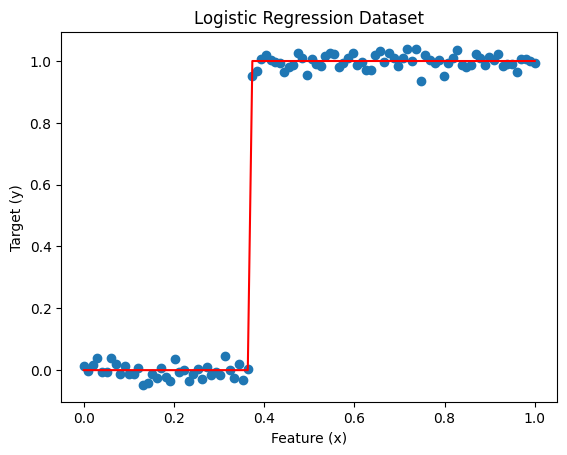

In [2]:
np.random.seed(42)  
num_samples = 100  
intercept = -0.80
slope = 2.15
noise_std = 0.025  
y=np.zeros(100)
x = np.linspace(-30,70, num=100)
scaler=MinMaxScaler()
x=x.reshape(-1,1)
x=scaler.fit_transform(x.reshape(-1,1))
logits = intercept + slope * x
probs = 1 / (1 + np.exp(-logits))
for i in range (0,100):
    if (probs[i]<0.5):
        y[i]=0
    else :
        y[i]=1
y_real = y + np.random.normal(0, noise_std, num_samples)
data = pd.DataFrame({'x': x.ravel(), 'y': y_real})
plt.scatter(data['x'], data['y'])
plt.plot(x,y,color="red")
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.title('Logistic Regression Dataset')
plt.show()

In [3]:
data.head()

,x,y
0,0.000000,0.012418
1,0.010101,-0.003457
2,0.020202,0.016192
3,0.030303,0.038076
4,0.040404,-0.005854


## Newton Raphson method :

$we\ have\ to\ maximize \ log\ likelihood\
l(\theta)=y*(\log(\sigma(h_\theta)))+(1-y)*(\log(1-\sigma(h_\theta)))$<br>
$where\ h_\theta=\theta_0+(\theta_1*x)$<br>
$Hence\ we\ find\ the\ root\ of\ \frac{\partial L}{\partial \theta}=0$<br>
$\theta_{k+1}=\theta_{k}-(H^{-1}\nabla l(\theta))$<br>
$H^{-1} = inverse\ of\ Hessian\ , \nabla l(\theta)= Gradient$<br>
$when\ J(\theta)-e(\theta)\sim 10^{-6} \ we\ stop\ the\ iterations\$

In [4]:
epsilon=1e-10
def sigmoid(x, t1, t0):                                                        
    z = (t1*x + t0).astype("float_")                                              
    return 1.0 / (1.0 + np.exp(-z))

In [5]:
def log_likelihood(x, y, t1, t0):                                                                
    sigmoid_probs = sigmoid(x, t1, t0)                                        
    return np.sum(-y * np.log(sigmoid_probs)
                  - (1 - y) * np.log(1 - sigmoid_probs+epsilon))

In [6]:
def gradient(x, y, t1, t0):                                                         
    sigmoid_probs = sigmoid(x, t1, t0)                                        
    return np.array([[-np.mean((y - sigmoid_probs) * x),                          
                     -np.mean((y - sigmoid_probs) * 1)]])                         

def hessian(x, y, t1, t0):                                                          
    sigmoid_probs = sigmoid(x, t1, t0)                                        
    d1 = -np.mean((sigmoid_probs * (1 - sigmoid_probs)) * x * x)                  
    d2 = -np.mean((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)                  
    d3 = -np.mean((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)                  
    H = np.array([[d1, d2],[d2, d3]])                                           
    return H

In [11]:
def newtons_method(x, y):                                                             

    # Initialize log_likelihood parameters                                                                   
    t1 =1.4                                                                     
    t0 = -0.5                                                                                                                               
    l = log_likelihood(x, y, t1, t0)                                                                 
    # Convergence Conditions                                                        
    e = 0.001                                                                
    max_iterations = 15                                                            
    i = 0
    converged=False
    t1_hist=[t1]
    t0_hist=[t0]
    while not converged:                                       
        i += 1                                                                      
        g = gradient(x, y, t1, t0)
        print(g)
        hess = hessian(x, y, t1, t0)
        print(hess)
        H_inv = np.linalg.inv(hess)
        print(H_inv)
        l = log_likelihood(x, y, t1, t0)
        m = np.dot(H_inv, g.T)                                                                                                                         
        print(m)
        t1_hist.append(t1)
        t0_hist.append(t0)
        # Perform our update step                                                    
        t1 -= m[0][0]                                                                 
        t0 -= m[1][0]                                                                 
        print(t1,t0)                                                                            
        # Update the log-likelihood at each iteration                                     
        l_new = log_likelihood(x, y, t1, t0)
        print(l_new)
        print(l)
        if(abs(l-l_new)<=e):
            print("converged,iteration:",i)
            converged = True
        elif(i>=max_iterations):
            print("max iterations exceeded")
            converged = True
    return np.array([t1, t0]),t1_hist,t0_hist

In [12]:
theta,t1_hist,t0_hist=newtons_method(x,y_real)
print(theta)
plt.figure()
plt.plot(range(len(t1_hist)), t1_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('t1')
plt.title('Convergence of t1')

plt.figure()
plt.plot(range(len(t0_hist)), t0_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('t0')
plt.title('Convergence of t0')

[[-0.01099493 -0.07952879]]
[[-0.07641992 -0.11631699]
 [-0.11631699 -0.2379685 ]]
[[-51.11125671  24.98275069]
 [ 24.98275069 -16.41359451]]
[[-1.42488331]
 [ 1.03066975]]
2.8248833052834352 -1.5306697456759335
7905.734841728548
6930.358321274644
[[-0.02183486 -0.15277532]]
[[-0.07204907 -0.10958887]
 [-0.10958887 -0.21428568]]
[[-62.48557686  31.95605042]
 [ 31.95605042 -21.00946539]]
[[-3.51773179]
 [ 2.5119718 ]]
6.342615097773878 -4.042641543704017
12103.827259197476
7905.734841728548
[[-0.0379682  -0.25157559]]
[[-0.05676581 -0.0837508 ]
 [-0.0837508  -0.13966571]]
[[-152.80025349   91.6269504 ]
 [  91.6269504   -62.10422111]]
[[-17.24955362]
 [ 12.14499575]]
23.592168720476458 -16.187637294804716
40118.589025833586
12103.827259197476
[[-0.04963882 -0.31166431]]
[[-0.01997917 -0.02876906]
 [-0.02876906 -0.04194047]]
[[-4081.0339301   2799.38432307]
 [ 2799.38432307 -1944.080375  ]]
[[-669.8904739]
 [ 466.9423335]]
693.4826426205808 -483.12997079858167
1085286.0806626694
40118.589

C:\Users\HP\AppData\Local\Temp\ipykernel_10684\2913838464.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_10684\2250130645.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(-y * np.log(sigmoid_probs)


LinAlgError: Singular matrix

which is nearly same as our initial coefficients